# 0.0. IMPORTS

In [1]:
import inflection
import math
import warnings

In [2]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 500)
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')
%matplotlib inline

## 0.1. Help Functions


## 0.2. Loading Data

In [4]:
df_sales_row = pd.read_csv('Db/Train.csv', low_memory=False)
df_store_row = pd.read_csv('Db/store.csv', low_memory=False)
df_sales_row.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_row = pd.merge(df_sales_row, df_store_row, how='left', on='Store')
df_row.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DE DADOS

In [6]:
df1 = df_row.copy()

In [7]:
cols_old = df1.columns

## 1.1. Rename Columns


In [8]:
snakecase   = lambda x: inflection.underscore(x)
cols_new    = list(map(snakecase,cols_old))
df1.columns = cols_new

In [9]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.2. Data Dimensions 


In [10]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3. Data Types 

In [11]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA 

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA  

In [14]:
# competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)

# competition_open_since_year
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month \
                                                if math.isnan(x['competition_open_since_month']) \
                                                else x['competition_open_since_month'], axis = 1)

# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) \
                                               else x['competition_open_since_year'], axis = 1)

# promo2_since_week               
df1['promo2_since_week'] =  df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) \
                                      else x['promo2_since_week'], axis = 1) 

# promo2_since_year               
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) \
                                    else x['promo2_since_year'], axis=1)
# promo_interval                  
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar',4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct', 11: 'Nov',12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo']  = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 \
                                                              if x['month_map'] in x['promo_interval'].split(',') \
                                                               else 0, axis=1) 

In [15]:
df1.sample(5).T

,338738,465523,699942,266012,803794
store,529,239,508,780,665
day_of_week,6,6,6,7,4
date,2014-09-13 00:00:00,2014-05-10 00:00:00,2013-10-12 00:00:00,2014-11-30 00:00:00,2013-07-11 00:00:00
sales,6380,5052,4677,0,7489
customers,673,545,556,0,1238
open,1,1,1,0,1
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,1
store_type,d,d,a,a,a


In [19]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Type

In [20]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [21]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year']  = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week']            = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year']            = df1['promo2_since_year'].astype('int64')

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical
A estatísca descritiva ser para temos conhencimento do negócio e identicar erros dos sistemas.

In [22]:
num_attribus = df1.select_dtypes(np.number)
cat_attribus = df1.select_dtypes(exclude=[np.number,'datetime64[ns]'])

In [23]:
num_attribus.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
200729,30,7,0,0,0,0,0,40.0,2,2014,1,10,2014,0
167705,456,2,8000,1059,1,1,0,140.0,3,2015,0,10,2015,0


In [24]:
cat_attribus.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


### 1.7.1. Numerical Attributes 
Métricas de primeira ordem.

In [25]:
# Central Tendency - mean, median 
ct1 = pd.DataFrame(num_attribus.apply(np.mean)).T
ct2 = pd.DataFrame(num_attribus.apply(np.median)).T

# Dispersion - str, min , max range skew, kurtosis
d1 = pd.DataFrame(num_attribus.apply(np.std)).T
d2 = pd.DataFrame(num_attribus.apply(min)).T
d3 = pd.DataFrame(num_attribus.apply(max)).T
d4 = pd.DataFrame(num_attribus.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attribus.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attribus.apply(lambda x: x.kurtosis())).T

# concatenete 
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m 

,attrobutes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


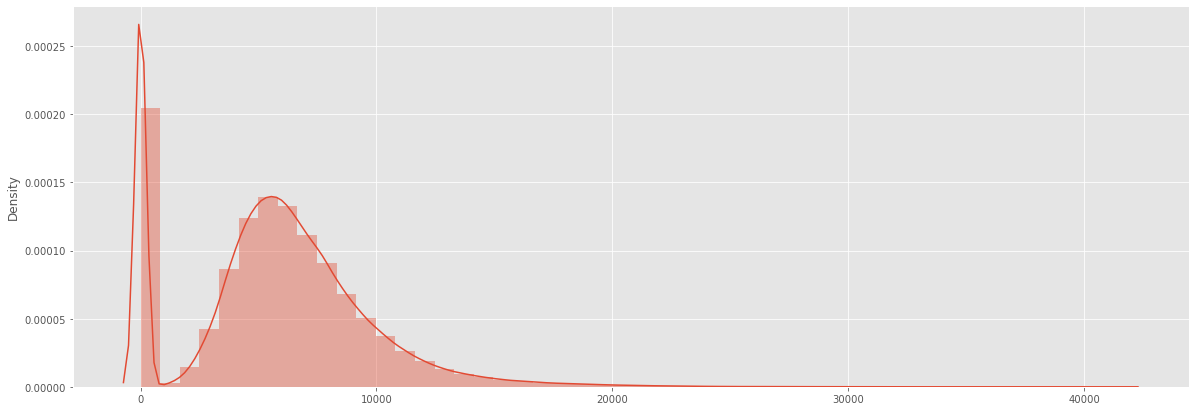

In [36]:
plt.figure(figsize=(20,7))
sns.distplot(df1['sales'].values);

Podemos observar que a sales está próximo de uma normal, tirando os zero.

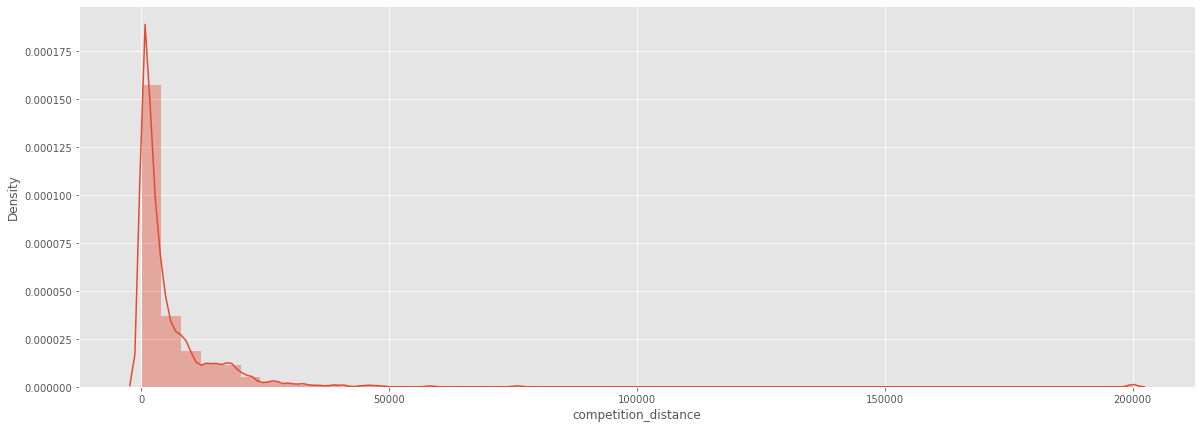

In [37]:
plt.figure(figsize=(20,7))
sns.distplot(df1['competition_distance']);

A competition_distance tem uma grande concentração de valor no começo, porque temos muitos competidores próximo um do outro, o gráfico parece com uma distribuição de poison. 

### 1.7.2. Categorical Attributes
Para as variáveis categórias vamos utilizar o boxplot, com ele podemos observar divesas medidas como de tendencia central e dispensão em um lugar. 

Antes vamos dar uma olhada quantos níveis cada variável categoria tem:

In [38]:
cat_attribus.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

Vamos analisar apenas as três primeiras.

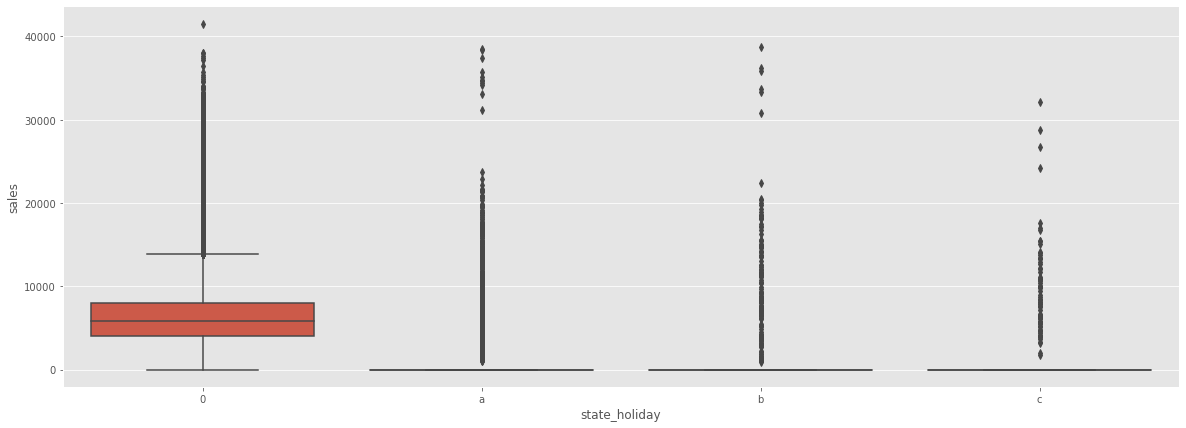

In [40]:
plt.figure(figsize=(20,7))
sns.boxplot(x='state_holiday', y= 'sales', data= df1);

Como podemos obsevar não conseguimos obsevar nada, porque nossos renge estão muitos diferentes, isso é muito provável porque dias que as lojas estão fechadas e venda igual a zero que correspondem aos dias que as lojas estavam fechadas. 

Vamos fazer um filtro com a seguinte regra: 
- pegar apenas as lojas que abriram e que as vendas sejam maior que 0 (zero).

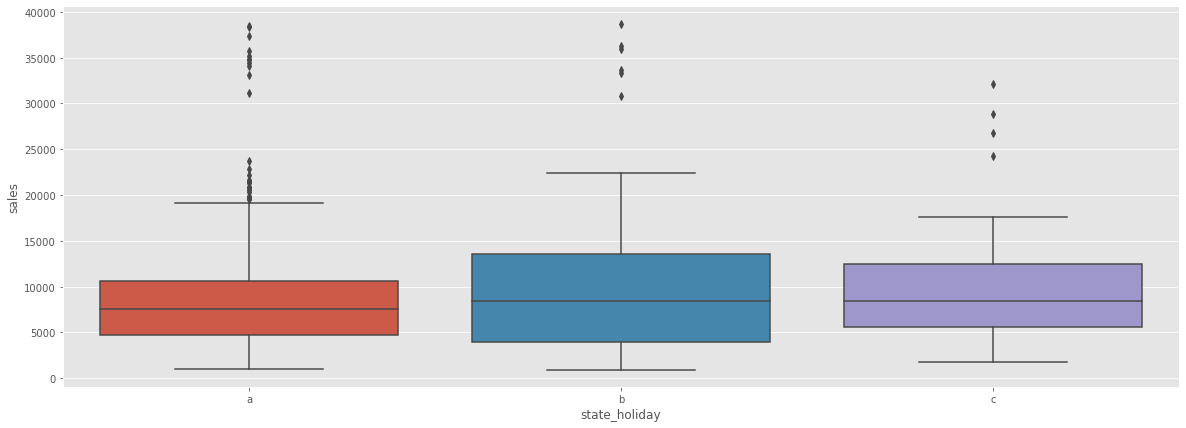

In [44]:
plt.figure(figsize=(20,7))
df1_aux = df1[(df1['state_holiday'] !='0' ) & (df1['sales'] >0 )]
sns.boxplot(x='state_holiday', y='sales', data=df1_aux);

Agora conseguimos ver alguma coisas, vamos plotar todas as variáveis uma do lado da outra: 

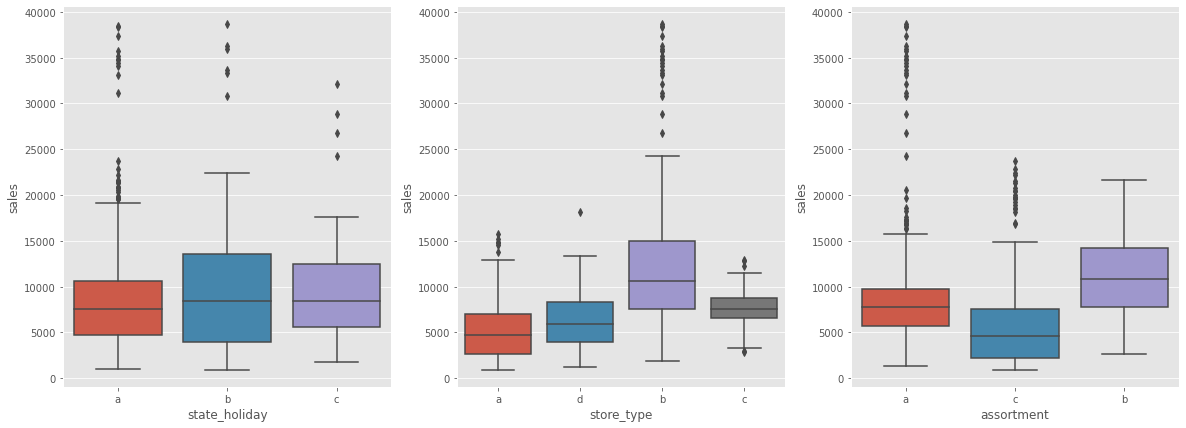

In [47]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=df1_aux)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=df1_aux)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=df1_aux);

**ANÁLISE** 

- **state_holiday**: No feriado do estado, o feriado **B** tem uma mediana maior que a do **A**, mas tem uma mediana muito parecida com ao do **C**, sendo que no **B** temos um equilíbrio de volume de vendas entre os  quartis 25 ao 75 em relação a mediana, enquanto ao feriado **C** temos uma maior concentração do quartil 50 ao 75;


- **store_type**: No tipo de loja, podemos observar que o tipo **B** tem um maior volume de venda em relação aos outros tipos, com muitos outliers e o volume não está em torno da mediana;


- **assortment**: No assortimento **B** tem um volume de venda maior que os outros assortimento, sendo que temos muitos outliers nos assortments **A** e **C**.

In [108]:
for col in (df1.select_dtypes('object')).columns:
    df1[col] = df1[col].astype('category')
  
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  category      
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  category      
 10  assortment                    1017209 non-null  category      
 11

In [112]:
df1.drop('promo_interval', axis=1).to_parquet('Db/df1.gzip', compression='gzip')

In [26]:
#from pandas.api.types import CategoricalDtype
from plotnine import *
#from plotnine.data import mpg
%matplotlib inline

(ggplot(df1)         # defining what data to use
 + aes(x='store_type')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

ModuleNotFoundError: No module named 'plotnine'

# OLHAR ISSO MUITO BOM
- https://jakevdp.github.io/PythonDataScienceHandbook/